In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import sympy as sym
from sympy.functions import exp
import math
from tqdm import tqdm

# Método de Newton-Raphson 

$$ f(x) = 3x^{5}+5x^{4}-x^{3} $$

In [2]:
def Function(x):
    #return 3*x**5 + 5*x**4 - x**3
    #return (2*x**4 - 2*x**3 + x**2 + 3*x - 4)
    #return (x**3 - 4*x**2 + 2)
    
    #return (3*x**2-1)/2.
    #return (5*x**3 - 3.*x)/2. 
    #return (35.*x**4 - 30.*x**2 + 3.)/8. 
    return (63*x**5 - 70*x**3 + 15*x)/8

In [3]:
def Derivative(f,x,h):
    d = 0.
    
    if(h != 0):
        d = (f(x+h)-f(x-h))/(2.*h)
        
    return d

In [4]:
xi, xf, Npoints = -1.,1.,1000
h = (xf-xi)/float(Npoints)

(-1, 1)

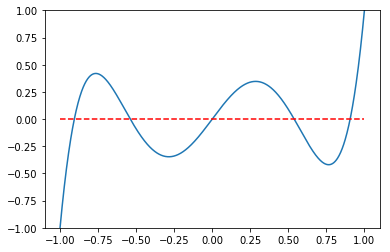

In [5]:
X = np.linspace(xi,xf,Npoints)
Y = Function(X)
Y1 = np.zeros(len(X))

plt.plot(X,Y)
plt.plot(X,Y1,'r--')
#plt.xlim(-1,4)
plt.ylim(-1,1)
#plt.grid()

In [6]:
def NewtonMethod(f,df,xn,error,it,precision=0.001,iterations=1000):
    
    h_ = 1.0e-4
    
    while error > precision and it < iterations:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn,h_)+1.0e-10
            error = np.abs((xn1-xn)/xn1)        
            
        except ZeroDivisionError:
            print("Division by Zero")
            
        xn = xn1
        it += 1
    
    #print(it)
    if it == iterations:
        return False
    else:
        return xn1

In [7]:
root = NewtonMethod(Function,Derivative,1,100,0)
print(root)

0.906179858254


In [8]:
def GetRoots(f,df, X, precision_=0.001, tolerancia=5):
    
    Roots = []
    
    for i in X:
        
        root = NewtonMethod(f,df,i,100,0,precision=precision_)
        
        if root != False:
            if round(root,tolerancia) not in Roots:
                Roots.append(round(root,tolerancia))
            
      
    return Roots

# Crear Polinomios y derivadas

In [9]:
def CreateLaguerrePoly(n):
    x1 = sym.Symbol('x', real=True)
    y = sym.Symbol('y', real=True)
    
    y = exp(-x1)*x1**n
    
    poly = exp(x1)*sym.diff(y,x1,n)/( math.factorial(n) )
    
    return poly

In [10]:
CreateLaguerrePoly(2)

x**2/2 - 2*x + 1

In [11]:
def GetWeight(f,xk,n):
    return xk/( ((n+1)*(f(xk)))**2 )

In [12]:
def Getleggauss(n):
    
    if n == 0 or n == 1:
        return 0,0
    
    Laguerre = []
    Laguerre_1 = []
    Weights = []
    
    x = sym.Symbol('x', real=True)  
    
    for i in range(0,n+1):
        
        poly = CreateLaguerrePoly(i)
        poly1 = CreateLaguerrePoly(i+1)
        Laguerre.append(poly)
        Laguerre_1.append( poly1 )
    
    #print(Laguerre[n],Laguerre_1[n]) 
        
    xi = np.linspace(0.,100,2000)
    
    pn = sym.lambdify([x], Laguerre[n],'numpy')
    pn1 = sym.lambdify([x], Laguerre_1[n],'numpy')

    Roots = GetRoots(pn,Derivative, xi, 0.0000001,tolerancia=7)
    Roots.sort()
    
    
    for j in Roots:
        Weights.append(round(GetWeight(pn1,j,n),7))
        
    Roots = np.array(Roots)
    Weights = np.array(Weights)
        
    return Roots, Weights

# Computing the integral for n=3

In [13]:
deg = 3
Roots, Weights = Getleggauss(deg)



for i in range(deg):
    print(Roots[i],Weights[i])

(0.4157746, 0.7110925)
(2.2942804, 0.2785177)
(6.2899451, 0.0103893)


In [14]:
Ie = np.pi**4/15.

f = lambda x : x**3/(1-np.exp(-x))

In [15]:
Integral = sum( Weights*f(Roots) )

In [16]:
print(Integral, Ie)

(6.481140690585725, 6.493939402266828)


# Plotting for some values of n

In [17]:
def GetIntegral(degMax):
    
    Ie = np.pi**4/15.
    f = lambda x : x**3/(1-np.exp(-x))
    
    Error = np.array([])
    Npoints = np.array([])
    
    for i in tqdm(range(2,degMax+1)):
        
        deg = i
        Roots, Weights = Getleggauss(deg)
        
        Integral = sum( Weights*f(Roots) )

        Npoints = np.append(Npoints, i) 
        Error = np.append(Error, Integral/Ie)
    
    return Npoints, Error

In [18]:
Npoints, Error = GetIntegral(10)

100%|██████████| 9/9 [00:04<00:00,  1.87it/s]


In [19]:
print(Error)

[0.98764817 0.99802913 1.00009237 1.0000688  0.99999884 0.99997119
 0.99997316 0.99995361 0.99999008]


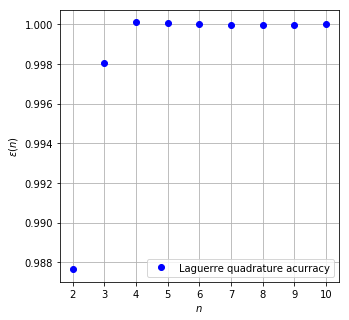

In [20]:
fig = plt.figure(figsize=(5,5))
plt.plot(Npoints,Error,'bo', label='Laguerre quadrature acurracy')
plt.xlabel(r'$n$')
plt.ylabel(r'$\epsilon(n)$')
#plt.yscale('log')
#plt.ylim(9.8e-1,1.001)
plt.grid()
plt.legend(loc=0)
plt.savefig('Laguerre.pdf')
plt.show()


In [21]:
def Laguerre(n):
    x2 = sym.Symbol('x2')
    roots = sym.Poly(sym.laguerre(n,x2)).all_roots()
    
    xi = [rt.evalf(10) for rt in roots]
    wi = [rt/( ((n+1)*sym.laguerre(n+1,rt))**2 ).evalf(10) for rt in roots]
    
    return xi, wi

In [22]:
Laguerre(2)

([0.5857864376, 3.414213562],
 [2.914213562 - 1.457106781*sqrt(2), 0.04289321881*sqrt(2) + 0.08578643763])